In [166]:
# import models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [197]:
data = pd.read_csv('mcs_ds_edited_iter_shuffled.csv')
data.tail()


,anchor_ratio,trans_range,node_density,iterations,ale,sd_ale
102,18,23,100,20,1.287472,0.375227
103,14,17,200,60,0.899102,0.231822
104,15,20,100,50,1.171140,0.372001
105,20,20,100,40,1.234493,0.599834
106,15,15,200,40,0.635426,0.139791


<Axes: >

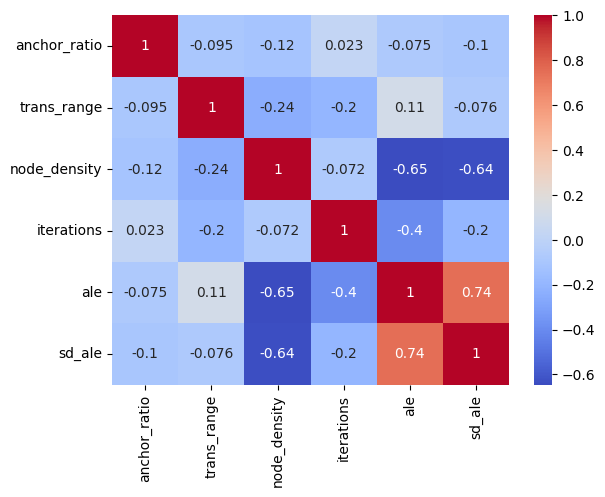

In [99]:
data_corr = data.corr()
sns.heatmap(data_corr, annot=True, cmap='coolwarm')

**if you need to transfer the data to numerical use **

`pd.get_dummies(DataFrame, columns = [column_1, column_2, column_3, column_)`

In [ ]:
sns.pairplot(data)

In [139]:
fig, ax = plt.subplots()
im = ax.imshow(data_corr, cmap='Set1', interpolation='none')
fig.colorbar(im, ax=ax, label='Interactive colorbar')
fig.tight_layout()
plt.show()

In [154]:
X = data.iloc[:,0:-1]
Y = data['sd_ale']


In [184]:
# split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=True)

In [193]:
# train a linear regression model
my_model = LinearRegression()
my_model.fit(X_train, Y_train)
my_model.intercept_
my_model.coef_

array([-0.00484194, -0.01530736, -0.00124409, -0.00072956,  0.19388639])

In [194]:
# check model error
mae_train = mean_absolute_error(Y_train, my_model.predict(X_train))
print('train Set: %.2f'% mae_train)

mae_test = mean_absolute_error(Y_test, my_model.predict(X_test))
print('test Set: %.2f'% mae_test)


train Set: 0.07
test Set: 0.06


In [215]:
# predict new values
new_values = pd.DataFrame(np.array([55,20,100,50,0.6548]).reshape(1,-1), columns=X.columns)

new_values = my_model.predict(new_values)
new_values.round(2)

array([0.08])